
---

### **Coding Quiz for ENE490 on CNNs and Neural Networks with PyTorch**
### **Duration: 1 hour**

---

#### **Question 1: Build a Simple CNN for MNIST Dataset**

**Task:**  
Write a Python program in Google Colab to:
1. Load the MNIST dataset.
2. Normalize the images to the range [0, 1].
3. Build a CNN model with the following architecture:
   - Input layer (28x28 grayscale image)
   - Convolutional Layer: 32 filters, 3x3 kernel, ReLU activation
   - MaxPooling Layer: 2x2 pool size
   - Flatten layer
   - Fully connected layer: 128 units, ReLU activation
   - Output layer: 10 units (Softmax activation)
4. Use the Adam optimizer and cross-entropy loss.
5. Train the model for 5 epochs with a batch size of 64.

**Hint:**  
Use the following PyTorch modules:
- `torchvision.datasets.MNIST`
- `torch.utils.data.DataLoader`
- `torch.nn.Conv2d`, `torch.nn.MaxPool2d`, `torch.nn.Linear`, `torch.nn.ReLU`, `torch.nn.Softmax`
- `torch.optim.Adam`

**Deliverables:**  
- Code implementation.
- Final training accuracy and loss.







In [ ]:
# Solution for Question 1, you can add more cells for coding below.

In [1]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transform
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [3]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

In [4]:
class SIMCNN(nn.Module):
    def __init__(self):
        super(SIMCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(32 * 13 * 13, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SIMCNN().to(device)

In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [7]:
losses = []
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

Epoch 1/5, Loss: 0.209820676575115
Epoch 2/5, Loss: 0.06950441889265287
Epoch 3/5, Loss: 0.04824030998551142
Epoch 4/5, Loss: 0.03797239072728596
Epoch 5/5, Loss: 0.026966195048226702


In [8]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'got {correct} / {total}   Accuracy {(float(correct)/float(total)*100)}')


got 9843 / 10000   Accuracy 98.42999999999999


---

#### **Question 2: Data Augmentation for Image Classification**

**Task:**  
Write a Python script in Google Colab to:
1. Use the CIFAR-10 dataset.
2. Apply data augmentation with the following transformations:
   - Random rotation: up to 20 degrees.
   - Random width and height shift: 10% of the image dimensions.
   - Random horizontal flip.
3. Display 9 augmented images from the training dataset in a 3x3 grid.

**Hint:**  
Use the following PyTorch modules:
- `torchvision.datasets.CIFAR10`
- `torchvision.transforms.Compose`
- Transformations like `RandomRotation`, `RandomAffine`, and `RandomHorizontalFlip`
- `matplotlib.pyplot.imshow()` to display images.

**Deliverables:**  
- Code implementation.
- Visualization of augmented images.

---

In [ ]:
# Solution for Question 2, you can add more cells for coding below.

In [15]:
import os
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as f
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transform
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

In [10]:
transform = transforms.Compose([
    transforms.RandomRotation(20),
    transforms.RandomAffine(0, translate=(0.1, 0.1)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])


In [11]:
train_dataset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=9,
    shuffle=True
)

Files already downloaded and verified


In [12]:
data_iter = iter(train_loader)
images, labels = next(data_iter)

In [13]:
def showimg(imgs):
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    for i, ax in enumerate(axes.flat):
        img = imgs[i].permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)
        ax.imshow(img)
        ax.axis()
    plt.show()


print("Displaying 9 augmented images:")

Displaying 9 augmented images:


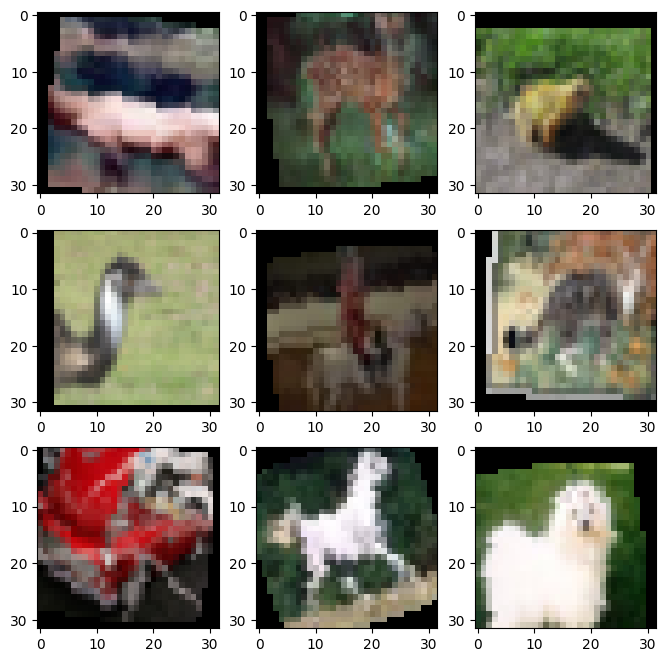

In [16]:
showimg(images)

#### **Question 3: Implement a Custom Training Loop**

**Task:**  
Train a fully connected neural network (FNN) for the Fashion-MNIST dataset using a custom training loop. Follow these steps:
1. Load the Fashion-MNIST dataset.
2. Normalize the data.
3. Build an FNN model with:
   - Flatten input layer.
   - Fully connected layer: 128 units, ReLU activation.
   - Fully connected layer: 64 units, ReLU activation.
   - Output layer: 10 units, Softmax activation.
4. Write a custom training loop:
   - Use SGD optimizer.
   - Compute loss using cross-entropy.
   - Backpropagate gradients manually using `loss.backward()` and `optimizer.step()`.
   - Train for 10 epochs with batch size of 32.
5. Plot training loss per epoch.

**Hint:**  
Use the following PyTorch methods:
- `torchvision.datasets.FashionMNIST`
- `torch.nn.Module` for defining the model.
- `torch.optim.SGD`
- `plt.plot()` for visualizing the loss.

**Deliverables:**  
- Code implementation.
- Training loss plot.

---


In [ ]:
# Solution for Question 3, you can add more cells for coding below.

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [29]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [30]:
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.6MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 173kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.26MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 7.80MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [31]:
class FNN(nn.Module):
    def __init__(self, out_classes=10):
        super(FNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.output = nn.Linear(64, out_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.output(x)
        return x

In [33]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = FNN().to(device)

In [34]:
optimizer = optim.SGD(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [35]:
num_epochs = 10
training_loss = []

for epoch in range(num_epochs):
    epoch_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    training_loss.append(avg_loss)
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {avg_loss:.4f}")

Epoch 1/10, Loss: 1.8849
Epoch 2/10, Loss: 1.0350
Epoch 3/10, Loss: 0.7702
Epoch 4/10, Loss: 0.6767
Epoch 5/10, Loss: 0.6243
Epoch 6/10, Loss: 0.5890
Epoch 7/10, Loss: 0.5628
Epoch 8/10, Loss: 0.5428
Epoch 9/10, Loss: 0.5262
Epoch 10/10, Loss: 0.5126


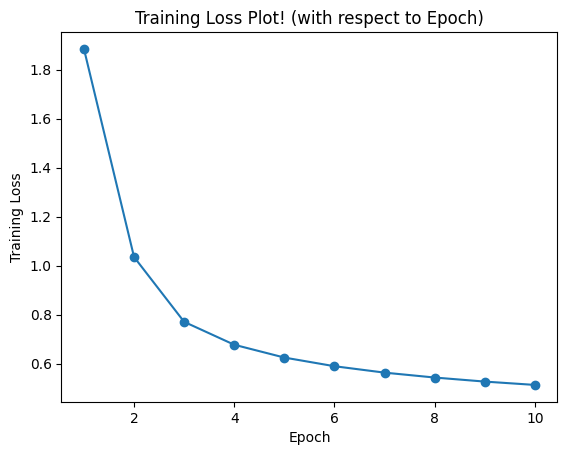

In [45]:
plt.plot(range(1, num_epochs + 1), training_loss, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.title('Training Loss Plot! (with respect to Epoch)')
plt.show()

#### **Question 4: Visualizing Filters and Feature Maps**

**Task:**  
1. Build a simple CNN for MNIST (similar to Question 1).
2. Train the model for 3 epochs.
3. Visualize:
   - The learned filters of the first convolutional layer.
   - Feature maps of the first 5 images from the test set.

**Hint:**  
Use the following steps:
- Extract filters using `model.conv1.weight.data`.
- Display filters using `matplotlib.pyplot.imshow()`.
- For feature maps, pass an image through the first convolutional layer and visualize the output using `torch.no_grad()`.

**Deliverables:**  
- Code implementation.
- Visualization of filters and feature maps.

---

In [ ]:
# Solution for Question 4, you can add more cells for coding below.

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [18]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [19]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [20]:
train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=5, shuffle=False)

In [23]:
class CNN4(nn.Module):
    def __init__(self, out_classes=10):
        super(CNN4, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2)
        self.fc1 = nn.Linear(6 * 13 * 13, out_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = torch.relu(x)
        x = self.pool(x)
        x = x.view(-1, 6 * 13 * 13)
        x = self.fc1(x)
        return x

In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
moele = CNN4().to(device)

In [26]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [28]:
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)

        loss = criterion(outputs, labels)
        loss.backward()

        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")

Epoch 1/3, Loss: 0.0253
Epoch 2/3, Loss: 0.0170
Epoch 3/3, Loss: 0.0128


Visualizing filters:


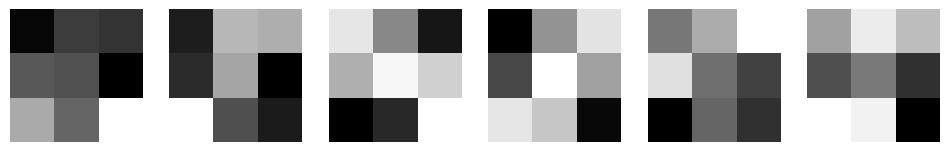

In [31]:
filters = model.conv1.weight.data.cpu()

print("Visualizing filters:")
fig, axes = plt.subplots(1, 6, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
    # Move the tensor to CPU before converting to NumPy
    filter_img = filters[i, 0].detach().numpy()
    ax.imshow(filter_img, cmap='gray')
    ax.axis('off')
plt.show()

Visualizing feature maps for the first 5 test images:


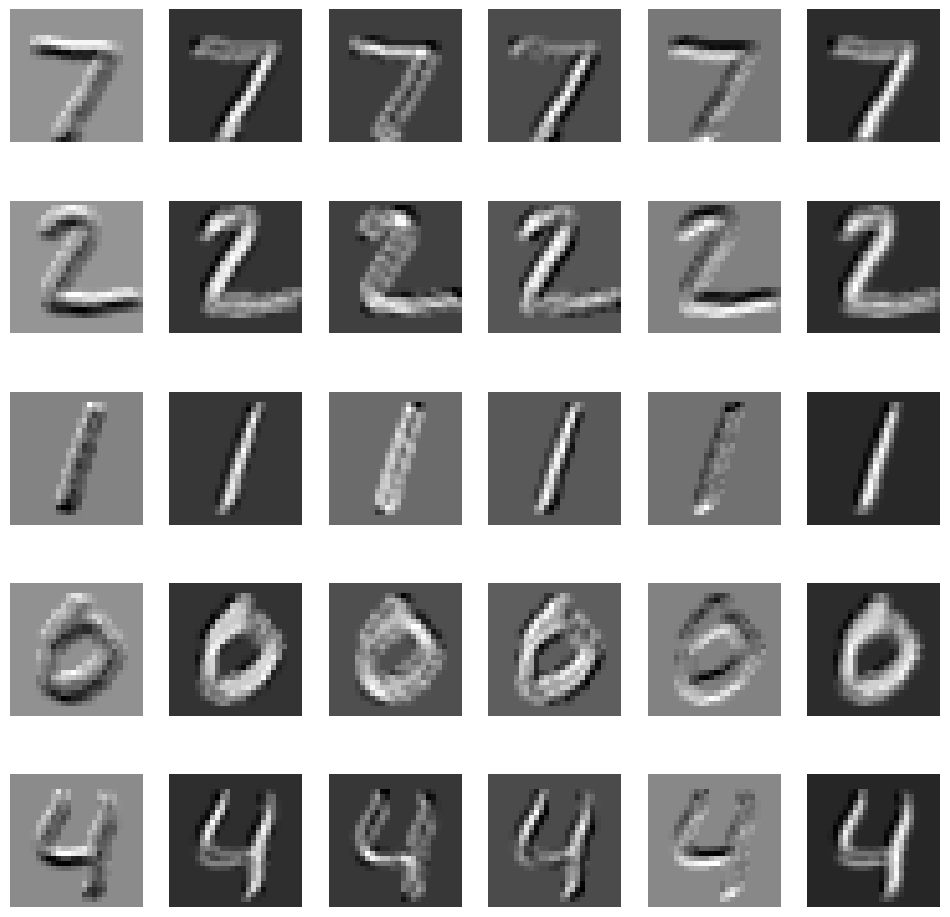

In [35]:
model.eval()
images, _ = next(iter(test_loader))
images = images.to(device)

with torch.no_grad():
    feature_maps = model.conv1(images)

print("Visualizing feature maps for the first 5 test images:")
fig, axes = plt.subplots(5, 6, figsize=(12, 12))
for i in range(5):
    for j in range(6):
        feature_map = feature_maps[i, j].cpu().detach().numpy()
        axes[i, j].imshow(feature_map, cmap='gray')
        axes[i, j].axis('off')
plt.show()